# Proyek Klasifikasi Gambar: [Intel Image Classification]
- **Nama:** [Mohamad Ewo Muliyono Zees]
- **Email:** [mohamadewozees4@gmail.com]
- **ID Dicoding:** [-]

## Packages/Library

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import pathlib

## Data Preparation

### Data Loading

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/puneet6060/intel-image-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohamadewozees
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification


100%|██████████| 346M/346M [00:00<00:00, 488MB/s]


Preview dataset yang akan dilatih pada model CNN

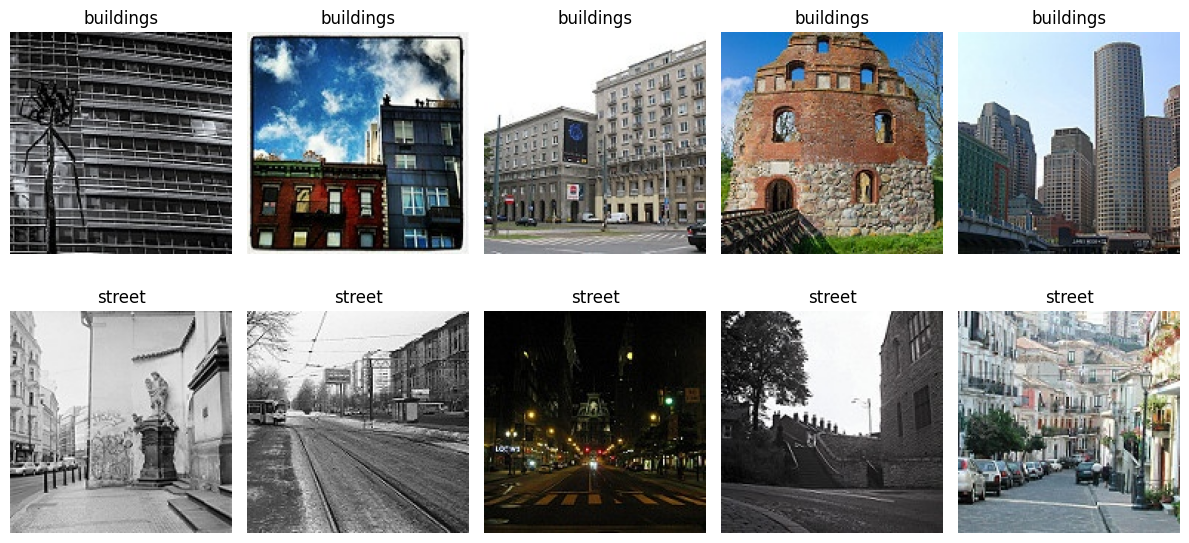

In [4]:
import os
import random
import matplotlib.image as mpimg

# Define Path
path = "/content/intel-image-classification/seg_train/seg_train"

# Mengambil semua nama kelas (subfolder)
classes = os.listdir(path)

# Memilih 2 kelas secara random
sample_classes = random.sample(classes, 2)

# Menampilkan 5 gambar random dari tiap kelas
plt.figure(figsize=(12, 6))

for idx, class_name in enumerate(sample_classes):
    class_path = os.path.join(path, class_name)
    images = os.listdir(class_path)
    sample_images = random.sample(images, 5)

    for i, img_file in enumerate(sample_images):
        img_path = os.path.join(class_path, img_file)
        img = mpimg.imread(img_path)

        plt.subplot(len(sample_classes), 5, idx*5 + i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(class_name)

plt.tight_layout()
plt.show()

### Data Preprocessing

Split Data

In [5]:
!pip install split-folders

In [6]:
import splitfolders


input_folder = "/content/intel-image-classification/seg_train/seg_train"

# membuat folder path baru untuk split data
output_folder = "/content/splitted_dataset"

# rasio split data
splitfolders.ratio(input_folder, output=output_folder, seed=1337, ratio=(0.7, 0.15, 0.15))


train_dir = "/content/splitted_dataset/train"
val_dir   = "/content/splitted_dataset/val"
test_dir  = "/content/splitted_dataset/test"

Copying files: 14034 files [00:02, 6423.96 files/s]


In [7]:
#Data augmentasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150,150), batch_size=32, class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(150,150), batch_size=32, class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150,150), batch_size=32, class_mode='categorical'
)

Found 9820 images belonging to 6 classes.
Found 2102 images belonging to 6 classes.
Found 2112 images belonging to 6 classes.


## Modelling

In [9]:
num_classes = train_generator.num_classes

cnn_model = Sequential([
    # layer pertama
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3), padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # layer kedua
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # layer ketiga
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # layer keempat
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),


    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 18, 18, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    10,617,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,010,758 (42.00 MB)

 Trainable params: 11,009,798 (42.00 MB)

 Non-trainable params: 960 (3.75 KB)

In [10]:
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
H = cnn_model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 84s 228ms/step - accuracy: 0.4190 - loss: 5.3266 - val_accuracy: 0.2559 - val_loss: 2.9665
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 62s 202ms/step - accuracy: 0.5380 - loss: 1.2159 - val_accuracy: 0.5856 - val_loss: 1.0074
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 61s 197ms/step - accuracy: 0.5899 - loss: 1.0928 - val_accuracy: 0.6541 - val_loss: 0.9098
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 61s 198ms/step - accuracy: 0.6200 - loss: 1.0284 - val_accuracy: 0.6194 - val_loss: 0.9351
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 61s 197ms/step - accuracy: 0.6380 - loss: 0.9892 - val_accuracy: 0.6813 - val_loss: 0.8945
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 61s 197ms/step - accuracy: 0.6682 - loss: 0.9239 - val_accuracy: 0.7031 - val_loss: 0.8804
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 61s 198ms/step - accuracy: 0.6766 - loss: 0.8997 - val_accuracy: 0.7407 - val_loss: 0.7270
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 61s 199ms/step - accuracy: 0.7009 - loss: 0

## Evaluasi dan Visualisasi

In [13]:
#test eval
test_loss, test_acc = cnn_model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8552 - loss: 0.4793
Test Accuracy: 0.8517992496490479


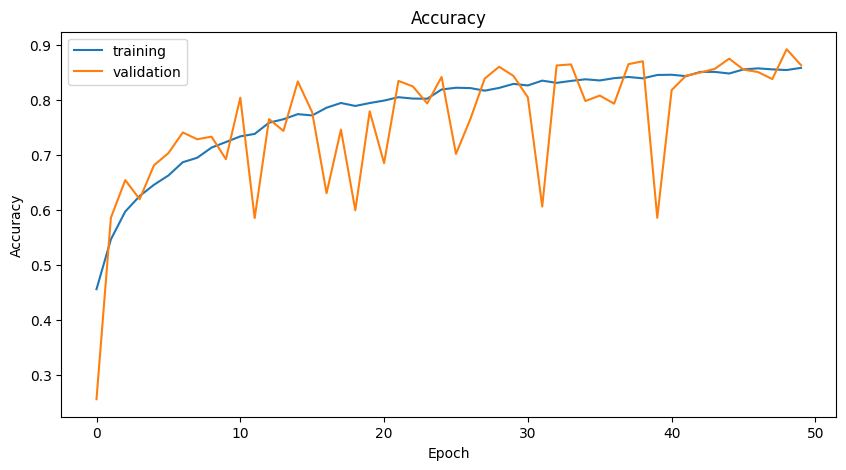

In [14]:
#Visualisasi accuracy

plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(H.history["accuracy"])), H.history["accuracy"], label="training")
plt.plot(np.arange(len(H.history["val_accuracy"])), H.history["val_accuracy"], label="validation")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

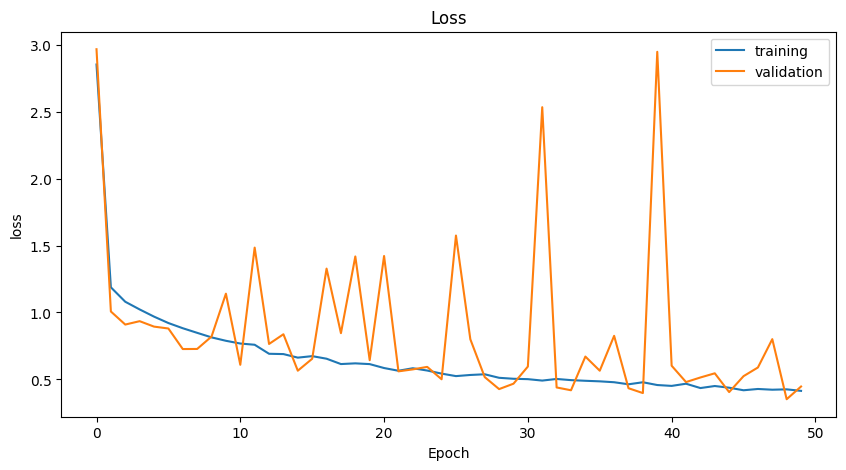

In [15]:
#Visualisasi loss

plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(H.history["loss"])), H.history["loss"], label="training")
plt.plot(np.arange(len(H.history["val_loss"])), H.history["val_loss"], label="validation")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

## Konversi Model

Menyimpan model kedalam format TFlite

In [16]:
export_dir = 'saved_model'
cnn_model.export(export_dir)

Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  136957177062480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136957177063824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136957177065552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136957177063632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136957177063056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136957177061520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136957177064784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136957177065168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136957177067088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136957177067280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136957177066512: Te

In [17]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [18]:
tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

44046272

Menyimpan model kedalam format TFjs

In [19]:
cnn_model.save("model.h5")

In [20]:
# Install tensorflowjs
!pip install tensorflowjs

# Convert model.h5 to model
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
google-cloud-bigquery 3.38.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
xarray 2025.9.0 requires packaging>=24.1, but you have packaging 23.2 which is incompatible.


2025-09-28 11:53:27.513934: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759060407.533358   14843 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759060407.539339   14843 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759060407.554296   14843 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759060407.554319   14843 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759060407.554323   14843 computation_placer.cc:177] computation placer alr

In [21]:
# Konversi file folder dalam bentuk Zip untuk memudahkan proses download dari notebook colab
!zip -r saved_model.zip saved_model/

!zip -r tfjs_model.zip tfjs_model/

  adding: saved_model/ (stored 0%)
  adding: saved_model/assets/ (stored 0%)
  adding: saved_model/saved_model.pb (deflated 87%)
  adding: saved_model/fingerprint.pb (stored 0%)
  adding: saved_model/variables/ (stored 0%)
  adding: saved_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: saved_model/variables/variables.index (deflated 70%)
  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/group1-shard10of11.bin (deflated 7%)
  adding: tfjs_model/group1-shard11of11.bin (deflated 7%)
  adding: tfjs_model/group1-shard1of11.bin (deflated 7%)
  adding: tfjs_model/group1-shard8of11.bin (deflated 7%)
  adding: tfjs_model/group1-shard5of11.bin (deflated 7%)
  adding: tfjs_model/group1-shard6of11.bin (deflated 7%)
  adding: tfjs_model/group1-shard7of11.bin (deflated 7%)
  adding: tfjs_model/group1-shard2of11.bin (deflated 7%)
  adding: tfjs_model/group1-shard4of11.bin (deflated 7%)
  adding: tfjs_model/group1-shard3of11.bin (deflated 7%)
  adding: tfjs_model/model.json 

In [22]:
!pip freeze > requirements.txt